In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [15]:
df=pd.read_csv(r"cancer patient data sets.csv")
pd.set_option('display.max_columns',None)
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


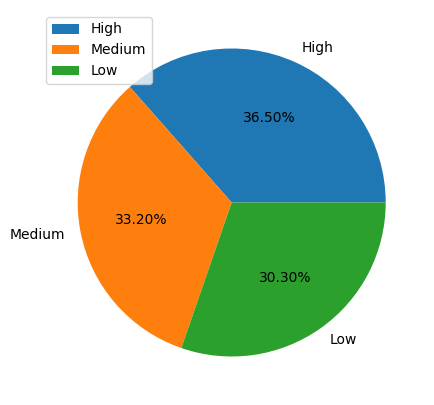

In [16]:
tdf=df['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['Level'],autopct='%.2f%%')
plt.legend(tdf['Level'])
plt.show()

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [18]:
df.isnull().any()


index                       False
Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

In [19]:
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [20]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [21]:
x=df.drop(columns='Level')
y=df['Level']

from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0          Coughing of Blood            0.587027
1             Passive Smoker            0.586692
2                    Obesity            0.546669
3                Alcohol use            0.534895
4                 Chest Pain            0.515841
5                   Wheezing            0.503628
6              Balanced Diet            0.487695
7               Dust Allergy            0.456034
8       OccuPational Hazards            0.410825
9        Shortness of Breath            0.408244
10              Genetic Risk            0.407879
11             Air Pollution            0.402829
12      chronic Lung Disease            0.401028
13                   Smoking            0.398355
14                       Age            0.379901
15                   Fatigue            0.357299
16  Clubbing of Finger Nails            0.268928
17             Frequent Cold            0.253005
18                 Dry Cough            0.238382
19               Wei

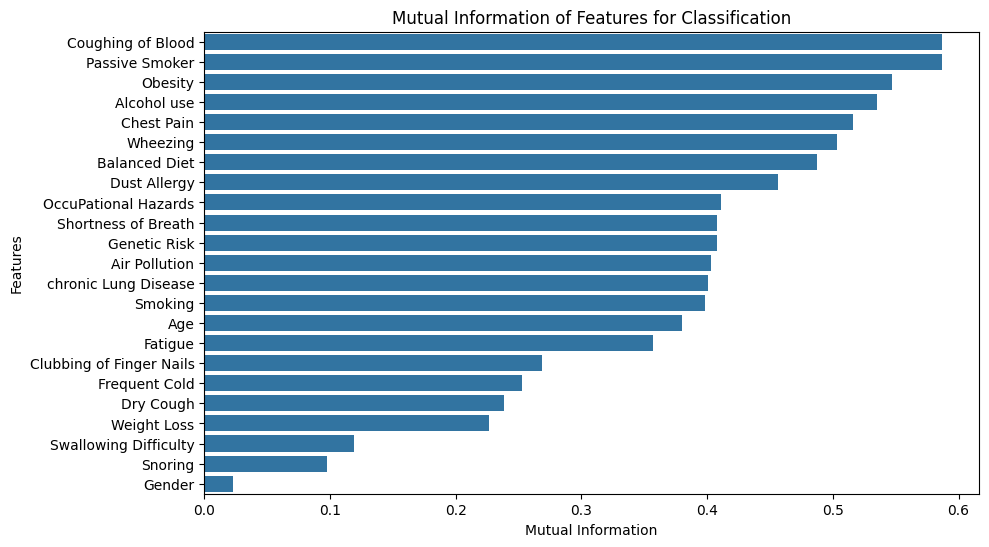

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [24]:
cm_t=[] 
cm=[] 

In [ ]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,n_jobs=-1,random_state=20,scoring='accuracy',param_distributions=params,cv=10) 
nknn.fit(x_train,y_train)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

{'n_neighbors': 6}
0.9973333333333333


In [26]:
pred_t=nknn.predict(x_train)
pred=nknn.predict(x_test)  
print('KNN Training Accuracy: ',accuracy_score(y_train,pred_t))
print('KNN Testing Accuracy: ',accuracy_score(y_test,pred))
print('\nClassification Report for KNN Classifier:\n\n ',classification_report(y_test,pred))
cmk_t=confusion_matrix(y_train,pred_t)
cm_t.append(cmk_t)
cmk=confusion_matrix(y_test,pred)
cm.append(cmk)

KNN Training Accuracy:  0.9973333333333333
KNN Testing Accuracy:  1.0

Classification Report for KNN Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [2]:
#save the model
import pickle
filename='KNN_model.pkl'
# pickle.dump(nknn,open(filename,'wb'))

In [3]:
# READ THE MODEL
import pickle
loaded_model=pickle.load(open(filename,'rb'))


In [4]:
type(loaded_model)

sklearn.neighbors._classification.KNeighborsClassifier

In [5]:
loaded_model.feature_names_in_

array(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker',
       'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
       'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
       'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough',
       'Snoring'], dtype=object)